In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('./Clean_Training_Data', index_col = 'Id')

In [3]:
test = pd.read_csv('./Clean_Testing_Data', index_col = 'Id')

In [4]:
y = pd.read_csv('./Prices', index_col = 'Id')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.25, random_state=0)

In [6]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [7]:
y_train = np.ravel(y_train)

#### Linear Regression

In [8]:
lr = LinearRegression()
model = lr.fit(X_train_sc, y_train)

In [9]:
model.score(X_train_sc, y_train)

0.9475473686575027

In [10]:
model.score(X_test_sc, y_test)

-2.914565943357603e+19

This R^2 score is telling me the Linear Regression model I've created is performing significantly worse than predictions made from taking the mean of the SalePrice.

#### RidgeCV

In [11]:
r_alphas = np.linspace(1, 500, 200)
ridge_reg = RidgeCV(alphas=r_alphas, cv=5)
model_R = ridge_reg.fit(X_train_sc, y_train)

In [12]:
model_R.score(X_train_sc, y_train)

0.9435541907051433

In [13]:
model_R.alpha_

199.09547738693468

In [14]:
model_R.score(X_test_sc, y_test)

0.9310745047419225

According to this score with a RidgeCV model, my model is highly predictive of scores in the test data from my train test split. I think in this case, the model is overfit, and would not work well on real life data.

#### LassoCV

In [15]:
l_alphas = np.logspace(-3, 5, 500)
lasso_reg = LassoCV(alphas=l_alphas, cv=5)
model_L = lasso_reg.fit(X_train_sc, y_train)

In [16]:
lasso_reg.score(X_train_sc, y_train)

0.9408253196778609

In [17]:
lasso_reg.score(X_test_sc, y_test)

0.9338924291577375

In [18]:
lasso_reg.alpha_

439.8317466650219

As with my ridge model, my LassoCV model seems to be overfit.  Looking at the coefficients, I noticed that many of them were zeroed out.

#### Elastic NetCV

In [19]:
elastic_reg = ElasticNetCV(n_alphas=200, cv=5, l1_ratio=0.9)
model_E = elastic_reg.fit(X_train_sc, y_train)

In [20]:
model_E.score(X_train_sc, y_train)

0.800276714832675

In [21]:
model_E.score(X_test_sc, y_test)

0.80712639331913

In [36]:
model_E.alpha_

63.70426542321445

My Elastic NetCV model, while having a lower R^2 Score, seems like it may be less overfit than my earlier models, and therefore might do better with real world data

In [22]:
test['Gr Liv Area'].min()

407

#### Plots

In [31]:
len(y_hat_X_test)

513

In [32]:
len(y)

2049

In [27]:
y_hat_X_test = model_E.predict(X_test_sc)

Plot of my predictions over my actual values

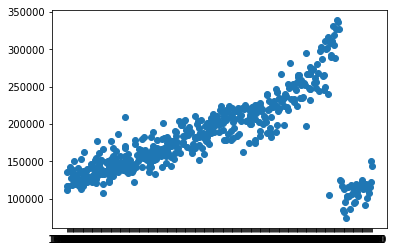

In [33]:
plt.scatter(y_test, y_hat_X_test)

In [34]:
model_E.score(X_test_sc, y_test)

0.80712639331913

#### Steps to Upload to Kaggle

In [24]:
test_sc = ss.transform(test)
y_hat = model_E.predict(test_sc)

In [ ]:
test_sc_index = np.asarray(test.index)

In [ ]:
test_sc_dict = {'SalePrice': y_hat}

In [ ]:
final_pd = pd.DataFrame(data=test_sc_dict, index=test_sc_index)

In [ ]:
final_pd.index.rename('Id', inplace=True)

In [ ]:
final_pd.to_csv('./Final_Model')